In [1]:
import numpy as np
import matplotlib.pyplot as plt

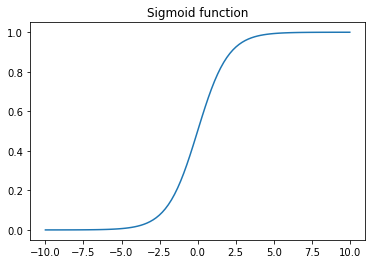

In [14]:
def sigmoid_function(z):
    return (1 / (1 + np.exp(-z)))

# construct a plot
x = np.linspace(-10,10,100)
y = sigmoid_function(x)
plt.plot(x,y)
plt.title("Sigmoid function")
plt.show()


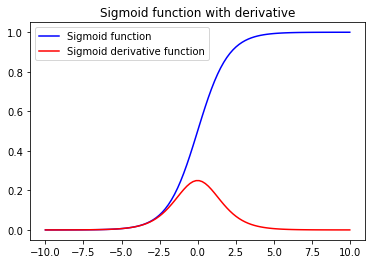

In [16]:
def sigmoid_derivative_function(z):
    return sigmoid_function(z) * (1 - sigmoid_function(z))

x = np.linspace(-10,10,100)
y_sigmoid = sigmoid_function(x)
y_sigmoid_derivative = sigmoid_derivative_function(x)
plt.plot(x,y_sigmoid, 'b')
plt.plot(x, y_sigmoid_derivative, 'r')
plt.title("Sigmoid function with derivative")
plt.legend(["Sigmoid function", 'Sigmoid derivative function'])
plt.show()


Notice that at both ends of the range the derivative (red line) approaches 0. In terms of tuning neural networks, this means that the corrections applied based on the loss function can become very small—causing the node to effectively stop learning. This is especially true of neural networks with several layers, because the vanishing gradient problem stacks across the layers.

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

(X_train_0, y_train_0),(X_test_0,y_test_0) = mnist.load_data()
print("Shape of train data, after loading from dataset: ", X_train_0.shape)
number_of_features = X_train_0[0].shape[0] * X_train_0[0].shape[1] 
unique_outcomes = np.unique(y_train_0)
number_of_unique_outcomes = len(unique_outcomes)

X_train = X_train_0.reshape(len(X_train_0), number_of_features)
X_test = X_test_0.reshape(len(X_test_0), number_of_features)

y_train = keras.utils.to_categorical(y_train_0, 
                                     num_classes=number_of_unique_outcomes,
                                     dtype='int')
y_test = keras.utils.to_categorical(y_test_0, 
                                     num_classes=number_of_unique_outcomes,
                                     dtype='int')

Shape of train data, after loading from dataset:  (60000, 28, 28)


In [29]:
def model_accuracy_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['training_data', 'validation_data'], loc='best')
    plt.show
    
def model_loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['training_data', 'validation_data'], loc='best')
    plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

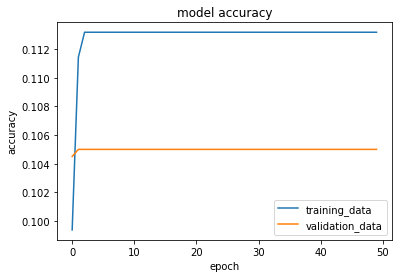

In [31]:
model = Sequential()
# first layer with input features and one hidden layer
model.add(Dense(units = 10,
                activation = 'sigmoid',
                input_shape=(number_of_features, )))

# add 10 hidden layers of 10 neurons
for i in range(10):
    model.add(Dense(units = 10,
                    activation='sigmoid'))

model.add(Dense(units = number_of_unique_outcomes,
                activation = 'softmax'))
print(model.summary())
print()

model.compile(optimizer="sgd", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=50,
                    verbose=0,
                    validation_split=0.1)

print()
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_36 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_37 (Dense)             (None, 90)                9090      
_________________________________________________________________
dense_38 (Dense)             (None, 80)                7280      
_________________________________________________________________
dense_39 (Dense)             (None, 70)                5670      
_________________________________________________________________
dense_40 (Dense)             (None, 60)                4260      
_________________________________________________________________
dense_41 (Dense)             (None, 50)               

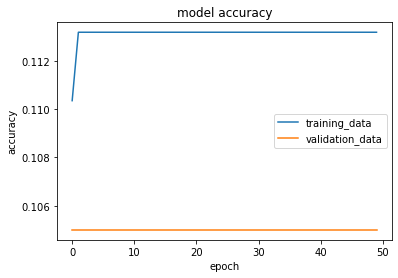

In [33]:
model = Sequential()
# first layer with input features and one hidden layer
model.add(Dense(units = 250,
                activation = 'sigmoid',
                input_shape=(number_of_features, )))

# add 10 hidden layers of 10 neurons
for i in range(100,10,-10):
    model.add(Dense(units = i,
                    activation='sigmoid'))

model.add(Dense(units = number_of_unique_outcomes,
                activation = 'softmax'))
print(model.summary())
print()

model.compile(optimizer="sgd", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=50,
                    verbose=0,
                    validation_split=0.1)

print()
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))

* From the above two examples it is observed that in neural networks with many layers, the correction during back propogation may not happen, hence there is no change in training accuracy after the first epoch. Now lets change the activation function to 'relu' and check the results for exact same architecture

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_48 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_49 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_50 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_51 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_52 (Dense)             (None, 10)               

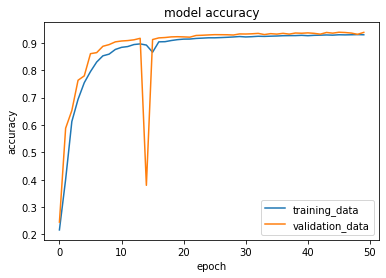

In [34]:
model = Sequential()
# first layer with input features and one hidden layer
model.add(Dense(units = 10,
                activation = 'relu',
                input_shape=(number_of_features, )))

# add 10 hidden layers of 10 neurons
for i in range(10):
    model.add(Dense(units = 10,
                    activation='relu'))

model.add(Dense(units = number_of_unique_outcomes,
                activation = 'softmax'))
print(model.summary())
print()

model.compile(optimizer="sgd", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=50,
                    verbose=0,
                    validation_split=0.1)

print()
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_59 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_60 (Dense)             (None, 90)                9090      
_________________________________________________________________
dense_61 (Dense)             (None, 80)                7280      
_________________________________________________________________
dense_62 (Dense)             (None, 70)                5670      
_________________________________________________________________
dense_63 (Dense)             (None, 60)                4260      
_________________________________________________________________
dense_64 (Dense)             (None, 50)               

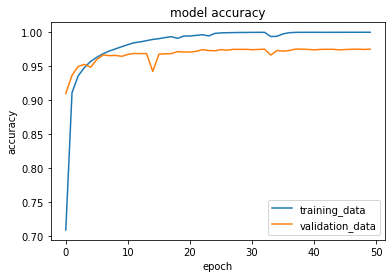

In [35]:
model = Sequential()
# first layer with input features and one hidden layer
model.add(Dense(units = 250,
                activation = 'relu',
                input_shape=(number_of_features, )))

# add 10 hidden layers of 10 neurons
for i in range(100,10,-10):
    model.add(Dense(units = i,
                    activation='relu'))

model.add(Dense(units = number_of_unique_outcomes,
                activation = 'softmax'))
print(model.summary())
print()

model.compile(optimizer="sgd", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=50,
                    verbose=0,
                    validation_split=0.1)

print()
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))

These results are not great, because this architecture isn't great, but changing the activation function to the Rectified Linear Unit (often called ReLU) we dramatically improved the performance of the network. This is the vanishing gradient problem rearing it's head.

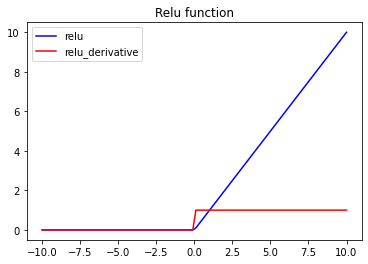

In [47]:
# This function is hard to read because we're applying it to
# numpy arrays, but for each item in x we return max(0, x[i])
def relu_function(x):
    return np.maximum(x, np.zeros(len(x)))

# This function is non-continuous, but the derivative can be 
# expressed as a very simple discrete function that works for
# our purpose, if x[i] > 0 return 1, else return 0:
def relu_derivative_function(x):
    return np.array([1 if num > 0 else 0 for num in x])

r = np.linspace(-10, 10, 100)
plt.plot(r, relu_function(r), 'b')
plt.plot(r, relu_derivative_function(r), 'r')
plt.title("Relu function")
plt.legend(['relu', 'relu_derivative'])
plt.show()



ReLU still has a kind of vanishing gradient problem, in fact the gradient can simply be 0, and once that happens the weights attached to that node will no longer be updated at all!

The simplicity of this function servers as an important reminder about neural networks and machine learning in general: fundamentally we are combining a lot of very simple things, and repeating a simple process MANY MANY times. The result is complex, but the procecss itself is built of simple parts.

With that in mind, brilliant machine learning specialists came up with a simple solution to ReLU's problems. They invented a function called "Leaky ReLU":


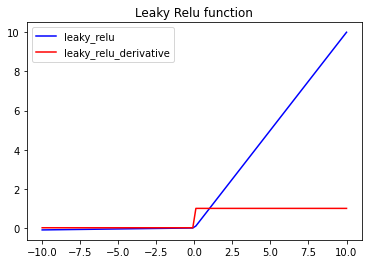

In [49]:
# For values greater than 0, leaky ReLU is the same as ReLU.
# For values less than 0, we return x[i] * 0.01 instead of just 0
# Now the gradient cannot die, because the line always has a slope.
def leaky_relu_function(x):
    return np.array([num if num > 0 else num * .01 for num in x])

def leaky_relu_derivative_function(x):
    return np.array([1 if num > 0 else .01 for num in x])

r = np.linspace(-10, 10, 100)
plt.plot(r, leaky_relu_function(r), 'b')
plt.plot(r, leaky_relu_derivative_function(r), 'r')
plt.title("Leaky Relu function")
plt.legend(['leaky_relu', 'leaky_relu_derivative'])
plt.show()

* Lets compare the results of relu and leaky relu

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_84 (Dense)             (None, 10)                110       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 10)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 10)                110       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 10)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 10)                110       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 10)               

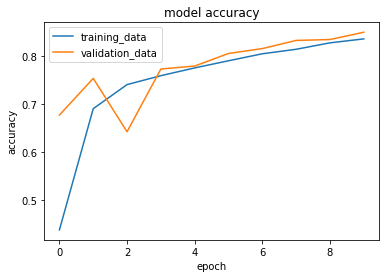

In [52]:
from keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(units = 10,
                activation = 'relu',
                input_shape = (number_of_features, )))

for i in range(10):
    model.add(Dense(units = 10,
              activation = 'relu'))
    model.add(LeakyReLU(alpha = 0.01))
    
model.add(Dense(units = number_of_unique_outcomes,
                activation = 'softmax'))

print(model.summary())

model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    epochs = 10,
                    batch_size = 150,
                    verbose = 2,
                    validation_split = 0.1)

loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))

There are other activation functions, and there is ongoing research into which ones perform best and experimenting with new activation functions.

In addition to the vanishing and dying gradient problems, another factor in the performance of activation functions is how efficent they are to compute, and how efficent their derivatives are to compute. Remember that we're computing these functions billions of times (or more!) during training. Relu is VERY FAST to compute, and so is it's derivative. Sigmoid, tanh, and some other commonly used activations are more expensive.



A rule of thumb: Things are changing quickly. Do some quick research before you build a new model to determine if there is a new "activation function of the week". Use that one. If it doesn't produce results, try a different one. Repeat until one works, or you have exhausted the activation functions that you know of. At that point, you may need to collect more data, change your architecture, or try a different kind of model.

At the time of this writing, one of the most popular activation functions is the Scaled Exponential Linear Unit (SELU). This activation is another modified ReLU, where the values greater than zero are still a linear function, the values below zero are an exponential curve, and the function scales the output to avoid a problem called "exploding gradient" which is the opposite of a dying or vanishing gradient:


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_96 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_97 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_98 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_99 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_100 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_101 (Dense)            (None, 10)              

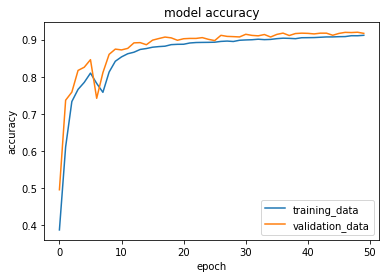

In [53]:
model = Sequential()
# first layer with input features and one hidden layer
model.add(Dense(units = 10,
                activation = 'selu',
                input_shape=(number_of_features, )))

# add 10 hidden layers of 10 neurons
for i in range(10):
    model.add(Dense(units = 10,
                    activation='selu'))

model.add(Dense(units = number_of_unique_outcomes,
                activation = 'softmax'))
print(model.summary())
print()

model.compile(optimizer="sgd", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=50,
                    verbose=0,
                    validation_split=0.1)

print()
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))


## The Importance of Non-Linearity

In order to satisfy the Universal Function Approximation theorem we must choose activation functions that are not strictly linear. Even ReLU counts, but if we only use linear activation functions then our neural networks, no matter how complex, can only learn to approximate linear functions themselves. See Deep Learning and Neural Network's Chapter 5 for a comprehensive proof of this.

## Special Cases

While many of these activation functions are "general purpose", especially in the hidden layers, there are a handful of important activation functions that serve special purposes. The softmax function is one such activation function that is widely used.

Softmax is used to produce N output values that always sum to one. It is almost always used in the final layer of classification networks, and we interpret the results as the proababilities or confidence of our network's predictions. Read more about softmax
